## Project:  Predicting hotel booking cancellations with XGBoost and a Neural Network
### César Muro Cabral 

### Businnes understanding:  
You are supporting a hotel with a project aimed to increase revenue from their room bookings.  
They believe that they can use data science to help them reduce the number of cancellations.  
This is where you come in! They have asked you to use any appropriate methodology to identify   
what contributes to whether a booking will be fulfilled or cancelled.   
They intend to use the results of your work to reduce the chance someone cancels their booking.  

Our goal is to determine which features or variables are most influential   
in causing customers to cancel their bookings. In addition,   
we constructed two machine learning models for classification to predict  
when a customer will cancel. Specifically, we were interested in constructing   
the models using Extreme Gradient Boosting (XGBoost) with cross-validation    
and a neural network with tensorflow.

We divided our work into three phases:

* Importing and cleaning the data
* Conducting exploratory data analysis
* Building the machine learning models: XGBoost with cross-validation and a Neural network with TensorFlow.

For the XGBoost model, we achieved an accuracy of 89% and an AUC score of 0.95 on a test set.  
 For the neural network, we obtained an accuracy of 87% and an AUC score of 0.92.

### Importing and cleaning data  
We load the csv file from my github:

In [106]:
#Importing data
import pandas as pd
url="https://raw.githubusercontent.com/cmuro27/Machine_Learning_Projects_and_Notes/main/Project_predicting_hotel_cancellations/hotel_reservations.csv"
df = pd.read_csv(url)
df.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

Apparantly, there is no issues such as column names with wrong characters. Let us inspect the data type of each column

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

Now, we check for null and the nuber of unique variables on each category.

In [9]:
print("The number of null values for each columns is: \n",
      df.isnull().sum())

The number of null values for each columns is: 
 Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64


In [10]:
print("The number of unique values for each columns is: \n", 
      df.nunique().T)

The number of unique values for each columns is: 
 Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3930
no_of_special_requests                      6
booking_status                              2
dtype: int64


Notice that our numerical variables are: lead_time, no_of_previous_cancellations, no_of_previous_bookings_not_canceled, avg_price_per_room, and, no_of_special_requests.  
The categorical variables are the rest of them.  
    
Our target variable to predict is bookin_status.  
  
We create two lists of the categorical and numerical features. We convert the categorical features to object data type.  


In [51]:
numerical_features = ['lead_time','no_of_previous_cancellations',
                      'no_of_previous_bookings_not_canceled',
                      'avg_price_per_room','no_of_special_requests',
                      'no_of_adults','no_of_children',
                      'no_of_weekend_nights','no_of_week_nights']
categorical_features = [i for i in list(df.columns) if i not in numerical_features]


### Exploratory data analysis

To generate a more precise Profile Report with pandas profiling,  
we are going to use an auxiliary dataframe where we convert to 'object'   
the data types of the categorical feature.

In [126]:
df_aux = df
for feature in categorical_features:
    df_aux[feature] = df_aux[feature].astype("category")

Let us generate a profiling report to know the distribution of the features:

In [18]:
from pandas_profiling import ProfileReport
pfr = ProfileReport(df_aux)
pfr

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Let us convert the targete variable as integer type.

In [53]:
df_aux.booking_status=(df_aux.booking_status=='Canceled').astype(int)
df_aux.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan required_car_parking_space  \
0                  2       Meal Plan 1                          0   
1                  3      Not Selected                          0   
2                  1       Meal Plan 1                          0   
3                  2       Meal Plan 1                          0   
4                  1      Not Selected                          0   

  room_type_reserved  lead_time arrival_year arrival_month arrival_date  \
0        Room_Type 1        224         2017            10            2   
1        Room_Type 1          5         2018            11            6   
2        Room_Type 1          1         2018             2           28   
3        Room_Type 1        211         2018             5           20   
4        Room_Type 1         48         2018             4           11   

  market_segment_type repeated_guest  no_of_previous_cancellations  \
0             Offline              0                             0   
1              Online              0                             0   
2              Online              0                             0   
3              Online              0                             0   
4              Online              0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests  booking_status  
0                       0               0  
1                       1               0  
2                       0               1  
3                       0               1  
4                       0               1

We can inspect with the mutual information metric how the 'churn' (or booking_status) variable depends or is influenced by the other categorical variables:

In [54]:
from sklearn.metrics import mutual_info_score
def calculate_mi(series):
    return mutual_info_score(series,df_aux.booking_status)

df[categorical_features].apply(calculate_mi).sort_values(ascending=False).to_frame(name='Mutual information score')

Mutual information score
booking_status                              0.632492
Booking_ID                                  0.632492
arrival_month                               0.023084
arrival_year                                0.018034
market_segment_type                         0.014089
repeated_guest                              0.008412
required_car_parking_space                  0.004504
arrival_date                                0.004457
type_of_meal_plan                           0.003668
room_type_reserved                          0.000778

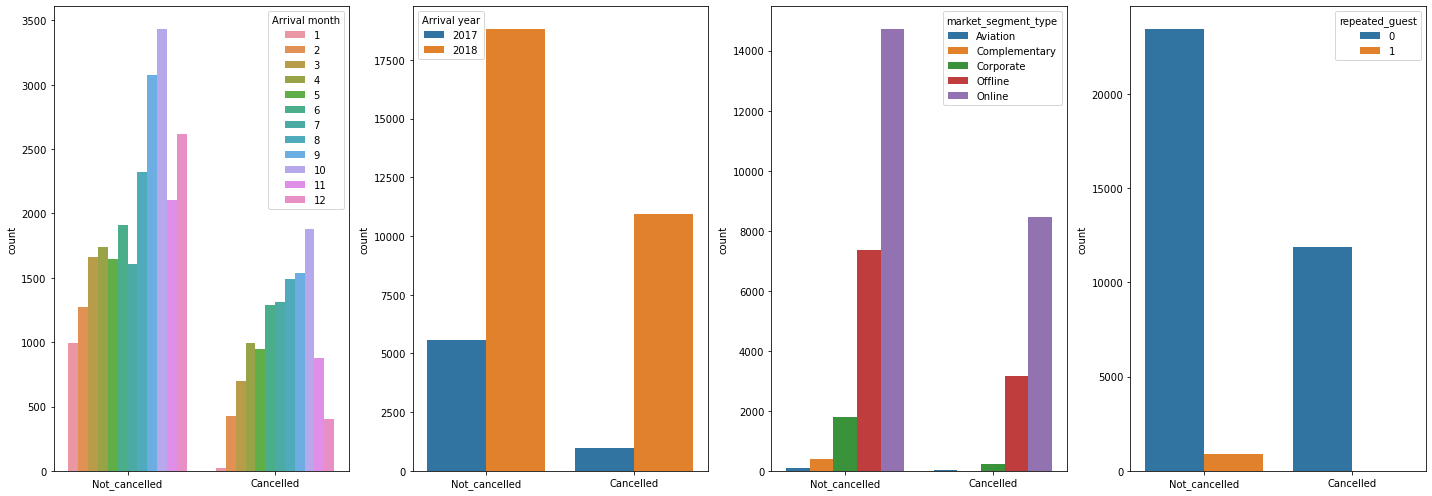

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(ncols=4,figsize=(20,7))
sns.countplot(x='booking_status',hue='arrival_month',
              data=df_aux,ax=axs[0])
axs[0].set(xticklabels=(['Not_cancelled','Cancelled']),
           xlabel=None)
axs[0].legend(title='Arrival month',loc='upper right')
sns.countplot(x='booking_status',hue='arrival_year',
              data=df_aux,ax=axs[1])
axs[1].legend(title='Arrival year',loc='upper left',
              labels=['2017','2018'])
axs[1].set(xticklabels=(['Not_cancelled','Cancelled']),
           xlabel=None)
sns.countplot(x='booking_status',hue='market_segment_type',
              data=df_aux,ax=axs[2])
axs[2].set(xticklabels=(['Not_cancelled','Cancelled']),
           xlabel=None)
sns.countplot(x='booking_status',hue='repeated_guest',
              data=df_aux,ax=axs[3])
axs[3].set(xticklabels=(['Not_cancelled','Cancelled']),
           xlabel=None)
plt.tight_layout()
plt.show()


In [57]:
# Using correlation coefficient
df[numerical_features].corrwith(df.booking_status).sort_values(ascending=True).to_frame(name="Correlation coefficient with numerical variables")

Correlation coefficient with numerical variables
no_of_special_requests                                                       -0.253070
no_of_previous_bookings_not_canceled                                         -0.060179
no_of_previous_cancellations                                                 -0.033728
no_of_children                                                                0.033078
no_of_weekend_nights                                                          0.061563
no_of_adults                                                                  0.086920
no_of_week_nights                                                             0.092996
avg_price_per_room                                                            0.142569
lead_time                                                                     0.438538

As we observe, no_specia_requests is negatively correlated with the cancelled_status. So, as more no_of_special_requests then the less often they tend to cancell reservation. On the other hand, lead time is positively correlated with the target variable, then as more lead time then the customers tend to cancelled the reservation.

#### Conclusions of the exploratory data analysis

* For the categorical variables, the relevant factors that most affect whether customers cancel their booking are the arrival month, the arrival year, and the market segment type. The arrival month where the customer most cancelled are in October, being the 'online' the most common segment type. 
* Regarding the numerical variables, as more the number of special requests make the customers then the less often they tend to cancell the reservation. On the other hand, the customers that lead more time tend to cancell more often.

### Machine learning models  
Once we have processed the data and making a exploratory data analysis, we proceed to create or models. We are going to use a xgboost classifier and a neural network. We employ for this pipelines, where we treat separately numerical and categorical data. For both, we will employ imputers for null values. For the numerical data, we also scaled the data. Then, we split the data in the training and test sets. We fit the model and evaluate.   
   
Although we are going to perform gridsearch through cross validation, we also test the effiency of our model on a test set.  

As we have a binary classification problem, we use the area under roc curve to measure the performance of our model. We also check the f1 score, accuracy, recall, and precision.

In [107]:
df.booking_status=(df.booking_status=='Canceled').astype(int)

#### XGB Classifier  
It is said that the hottest machine learnig library is XGBoost.  

In [121]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, 
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.pipeline import Pipeline
import numpy as np

#We specify the features and target variable
X= df.loc[:,~df.columns.isin(['booking_status'])]
y= df['booking_status']

# Lists with numeric and categorical features
numerical_features = ['no_of_adults','no_of_children',
                      'no_of_weekend_nights',
                      'no_of_week_nights',
                      'required_car_parking_space',
                      'lead_time','repeated_guest',
                      'no_of_previous_cancellations',
                      'no_of_previous_bookings_not_canceled',
                      'avg_price_per_room',
                      'no_of_special_requests']
categorical_features = [i for i in list(df.columns) if i not in numerical_features]
categorical_features.remove('Booking_ID')
categorical_features.remove('booking_status')

#Pipeline for preprocessing the numeric data
numerical_transfomer=Pipeline(steps=[('imp_num',
                                      SimpleImputer(strategy='median')),
                                     ('scaler',StandardScaler())])

# Pipeline for preprocessing the categorical data
categorical_transformer=Pipeline(steps=[('imp_cat',
                                         SimpleImputer(strategy='most_frequent')),
                                        ('onehot',
                                         OneHotEncoder(handle_unknown = 'ignore'))])

# Making the preprocessor with the previous steps
preprocessor=ColumnTransformer(transformers=[('num',
                                              numerical_transfomer,
                                              numerical_features),
                                             ('cat', 
                                              categorical_transformer,
                                              categorical_features)])

# Split the data in training and test sets.
# Although we will perform GridSearh with cross-validation 
we also going to verify our model on a test set
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    random_state=40, 
                                                    stratify=y)

pipeline_xgb = Pipeline(steps=[('preprocess',preprocessor),
                               ('xgb',
                                xgb.XGBClassifier(objective='binary:logistic',
                                                  seed=123))])

# Defining the grid parameters
gbm_param_grid={'xgb__learning_rate':[0.01,0.1,0.5,0.9],
                'xgb__n_estimators':[150],
                'xgb__subsample':[0.3,0.5,0.9],'
                xgb__n_estimators':[50], 
                'xgb__max_depth': [2,5]}
kf= StratifiedKFold(n_splits=3,shuffle=True,random_state=40)

# Defining the grid
cv=GridSearchCV(estimator=pipeline_xgb,
                param_grid=gbm_param_grid,
                scoring='roc_auc',
                verbose=1,
                cv=kf)

We fit the model on the training set

In [122]:
cv.fit(X_train,y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=40, shuffle=True),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imp_num',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['no_of_adults',
                                                                          'no_of_children',
                                                                          'no_of_weekend_nights',
                                                                         

In [123]:
#Print the tuned parameters and score
print('Tuned XGB classifier parameters: {}'.format(cv.best_params_))
print("Tuned XGB classifier roc_auc Score: {}".format(cv.best_score_))

Tuned XGB classifier parameters: {'xgb__learning_rate': 0.5, 'xgb__max_depth': 5, 'xgb__n_estimators': 50, 'xgb__subsample': 0.9}
Tuned XGB classifier roc_auc Score: 0.9416288482613209


Now, we obtain the best model and investigate its performance in the test model

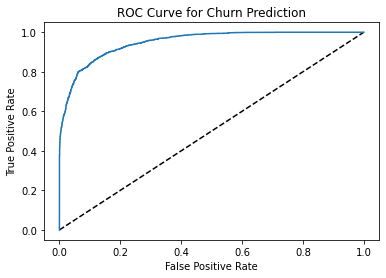

Tuned XGB classifier roc_auc Score on test data 0.9499461233569003
The confusion matrix takes the form 
 [[4583  295]
 [ 484 1893]]
The classification report 
               precision    recall  f1-score   support

           0       0.90      0.94      0.92      4878
           1       0.87      0.80      0.83      2377

    accuracy                           0.89      7255
   macro avg       0.88      0.87      0.88      7255
weighted avg       0.89      0.89      0.89      7255



In [128]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score
# Select best estimator
xgb_best_model = cv.best_estimator_

# Predict on the test data
pred_probs = xgb_best_model.predict_proba(X_test)[:,1]
y_pred = xgb_best_model.predict(X_test)
#import the roc curve
from sklearn.metrics import roc_curve

# Generating curve values
fpr, tpr, thresholds = roc_curve(y_test, pred_probs)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Churn Prediction')
plt.show()
print("Tuned XGB classifier roc_auc Score on test data",
      roc_auc_score(y_test,pred_probs))

# Calculate the confusion matrix
print("The confusion matrix takes the form \n",
      confusion_matrix(y_test, y_pred))

# Calculate the classification report
print("The classification report \n",
      classification_report(y_test, y_pred))

As we can see, we have obtained a very good model.  
To save our model, we can use the pickle library:  

In [138]:
# To save the model, we first import the Pickle module, and then use the dump function
import os
ruta = "C:/Users/cmuro/Documents/hotel_classification_xg_nn"
os.chdir(ruta)
import pickle
with open('xgb_model.bin', 'wb') as f_out:
    pickle.dump(xgb_best_model, f_out)

#### Neural network:  
Let us create a neural network for binary classification using tensorflow with keras. Our intention is to use the neural network model as an estimator in a pipeline. Then we need to create a function to store the model and wrape our model using the library scikeras:

In [218]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
tf.random.set_seed(123)



#We specify the features and target variable
X= df.loc[:,~df.columns.isin(['booking_status'])]
y= df['booking_status']
input_shape = X.shape[1]


# Lists with numeric and categorical features
numerical_features = ['no_of_adults','no_of_children',
                      'no_of_weekend_nights',
                      'no_of_week_nights',
                      'required_car_parking_space',
                      'lead_time','repeated_guest',
                      'no_of_previous_cancellations',
                      'no_of_previous_bookings_not_canceled',
                      'avg_price_per_room',
                      'no_of_special_requests']
categorical_features = [i for i in list(df.columns) if i not in numerical_features]
categorical_features.remove('Booking_ID')
categorical_features.remove('booking_status')

#Pipeline for preprocessing the numeric data
numerical_transfomer=Pipeline(steps=[('imp_num',
                                      SimpleImputer(strategy='median')),
                                     ('scaler',StandardScaler())])

# Pipeline for preprocessing the categorical data
categorical_transformer=Pipeline(steps=[('imp_cat',
                                         SimpleImputer(strategy='most_frequent')),
                                        ('onehot',
                                         OneHotEncoder(handle_unknown = 'ignore'))])

# Making the preprocessor with the previous steps
preprocessor=ColumnTransformer(transformers=[('num', 
                                              numerical_transfomer, 
                                              numerical_features),
                                             ('cat', 
                                              categorical_transformer,
                                              categorical_features)])

# Define the arrays for the models
X_array = preprocessor.fit_transform(X)
y_array = np.array(y.values)

# Spliting data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_array, y_array,
                                                  test_size=0.2,
                                                  random_state=123)



import tensorflow as tf
tf.random.set_seed(123)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(100,activation='relu',
                input_shape=(X_array.shape[1],)))
model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy','AUC'])
model.fit(X_train,y_train,
          epochs=10,
          validation_data=(X_val,y_val))



Epoch 1/10
907/907 [==============================] - 5s 3ms/step - loss: 0.3941 - accuracy: 0.8187 - auc: 0.8838 - val_loss: 0.3627 - val_accuracy: 0.8353 - val_auc: 0.9005
Epoch 2/10
907/907 [==============================] - 3s 3ms/step - loss: 0.3416 - accuracy: 0.8466 - auc: 0.9143 - val_loss: 0.3493 - val_accuracy: 0.8433 - val_auc: 0.9132
Epoch 3/10
907/907 [==============================] - 3s 3ms/step - loss: 0.3167 - accuracy: 0.8605 - auc: 0.9267 - val_loss: 0.3282 - val_accuracy: 0.8535 - val_auc: 0.9193
Epoch 4/10
907/907 [==============================] - 3s 3ms/step - loss: 0.3012 - accuracy: 0.8667 - auc: 0.9339 - val_loss: 0.3257 - val_accuracy: 0.8578 - val_auc: 0.9214
Epoch 5/10
907/907 [==============================] - 3s 3ms/step - loss: 0.2870 - accuracy: 0.8707 - auc: 0.9400 - val_loss: 0.3171 - val_accuracy: 0.8609 - val_auc: 0.9245
Epoch 6/10
907/907 [==============================] - 3s 3ms/step - loss: 0.2734 - accuracy: 0.8797 - auc: 0.9457 - val_loss: 0.32

As we observe, now we have get a model with a auc metric around 0.92 and a accuracy around 87 % on the test sets. 

### Conclusions:
We have completed a full machine learning task and developed models for deployment.    
As previously mentioned, our XGBoost model achieved an accuracy of 89% and  
an AUC score of 0.95 on the test set, while the neural network yielded   
an accuracy of 87% and an AUC score of 0.92.      
We plan to showcase and utilize these models as web applications  
using either Streamlit or Flask with Docker.    

Finally, we save our neural network model on a personal folder:

In [219]:
model.save('C:/Users/cmuro/Documents/hotel_classification_xg_nn/neural_network_mode_hotel_classification.h5')